In [1]:
import numpy as np
import operator
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
class GridWorld:
    def __init__(self):
        self.height = 8
        self.width = 8
        self.grid = np.zeros(( self.height, self.width)) - 1
        # 
        self.current_location = (7,7)
        
        # Set locations for the gold,silver and danger
        self.gold_location = (6,2)
        self.silver_location = (5,5)
        self.danger_location = (0,0)
        self.terminal_states = [ self.gold_location, self.silver_location, self.danger_location]
        
        # Set grid rewards for special cells
        self.grid[ self.danger_location[0], self.danger_location[1]] = -10
        self.grid[ self.gold_location[0], self.gold_location[1]] = 10
        self.grid[ self.silver_location[0], self.silver_location[1]] = 5
        
        # Set available actions
        self.actions = ['N', 'S', 'E', 'W']
        
    def get_available_actions(self):
        """Returns possible actions"""
        return self.actions
    
    def get_reward(self, new_location):
        """Returns the reward for an input position"""
        return self.grid[new_location[0], new_location[1]]
    
    def make_step(self, action):
        """Moves the agent in the specified direction. If agent is at a border, agent stays still
        but takes negative reward. Function returns the reward for the move."""
        # Store previous location
        last_location = self.current_location
        
        # N
        if action == 'N':
            # If agent is at the top, stay still, collect reward
            if last_location[0] == 0:
                reward = self.get_reward(last_location)
            else:
                self.current_location = ( self.current_location[0] - 1, self.current_location[1])
                reward = self.get_reward(self.current_location)
                
        # S
        elif action == 'S':
            # If agent is at bottom, stay still, collect reward
            if last_location[0] == self.height - 1:
                reward = self.get_reward(last_location)
            else:
                self.current_location = ( self.current_location[0] + 1, self.current_location[1])
                reward = self.get_reward(self.current_location)
                
        # E
        elif action == 'W':
            # If agent is at the left, stay still, collect reward
            if last_location[1] == self.width - 1:
                reward = self.get_reward(last_location)
            else:
                self.current_location = ( self.current_location[0], self.current_location[1] + 1)
                reward = self.get_reward(self.current_location)
                
        # W
        elif action == 'E':
            # If agent is at the right, stay still, collect reward
            if last_location[1] == 0:
                reward = self.get_reward(last_location)
            else:
                self.current_location = ( self.current_location[0], self.current_location[1] - 1)
                reward = self.get_reward(self.current_location)
                
        return reward
    
    def check_state(self):
        """Check if the agent is in a terminal state (gold,silver or danger), if so return 'TERMINAL'"""
        if self.current_location in self.terminal_states:
            return 'TERMINAL'

In [28]:
class RandomAgent():        
    # Choose a random action
    def choose_action(self, available_actions):
        """Returns a random choice of the available actions"""
        return np.random.choice(available_actions) 

In [29]:
    class Q_Agent():
        # Intialise
        def __init__(self, environment, epsilon=0.05, alpha=0.7, gamma=0.6):
            self.environment = environment
            self.q_table = dict() # Store all Q-values in dictionary of dictionaries 
            for x in range(environment.height): # Loop through all possible grid spaces, create sub-dictionary for each
                for y in range(environment.width):
                    self.q_table[(x,y)] = {'N':0, 'S':0, 'W':0, 'E':0} # Populate sub-dictionary with zero values for possible moves

            self.epsilon = epsilon
            self.alpha = alpha
            self.gamma = gamma

        def choose_action(self, available_actions):
            """Returns the optimal action from Q-Value table. If multiple optimal actions, chooses random choice.
            Will make an exploratory random action dependent on epsilon."""
            if np.random.uniform(0,1) < self.epsilon:
                action = available_actions[np.random.randint(0, len(available_actions))]
            else:
                q_values_of_state = self.q_table[self.environment.current_location]
                maxValue = max(q_values_of_state.values())
                action = np.random.choice([k for k, v in q_values_of_state.items() if v == maxValue])

            return action

        def learn(self, old_state, reward, new_state, action):
            """Updates the Q-value table using Q-learning"""
            q_values_of_state = self.q_table[new_state]
            max_q_value_in_new_state = max(q_values_of_state.values())
            current_q_value = self.q_table[old_state][action]

            self.q_table[old_state][action] = (1 - self.alpha) * current_q_value + self.alpha * (reward + self.gamma * max_q_value_in_new_state)

In [30]:
def play(environment, agent, trials=100, max_steps_per_episode=1000, learn=False):
    """The play function runs iterations and updates Q-values if desired."""
    reward_per_episode = [] # Initialise performance log
    
    for trial in range(trials): # Run trials
        cumulative_reward = 0 # Initialise values of each game
        step = 0
        game_over = False
        while step < max_steps_per_episode and game_over != True: # Run until max steps or until game is finished
            old_state = environment.current_location
            action = agent.choose_action(environment.actions) 
            reward = environment.make_step(action)
            new_state = environment.current_location
            
            if learn == True: # Update Q-values if learning is specified
                agent.learn(old_state, reward, new_state, action)
                
            cumulative_reward += reward
            step += 1
            
            if environment.check_state() == 'TERMINAL': # If game is in terminal state, game over and start next trial
                environment.__init__()
                game_over = True     
                
        reward_per_episode.append(cumulative_reward) # Append reward for current trial to performance log
        
    return reward_per_episode # Return performance log

In [31]:
env = GridWorld()
agent = RandomAgent()

print("Current position of the agent =", env.current_location)
available_actions = env.get_available_actions()
print("Available_actions =", available_actions)
chosen_action = agent.choose_action(available_actions)
print("Randomly chosen action =", chosen_action)
reward = env.make_step(chosen_action)
print("Reward obtained =", reward)
print("Current position of the agent =", env.current_location)

Current position of the agent = (7, 7)
Available_actions = ['N', 'S', 'E', 'W']
Randomly chosen action = E
Reward obtained = -1.0
Current position of the agent = (7, 6)


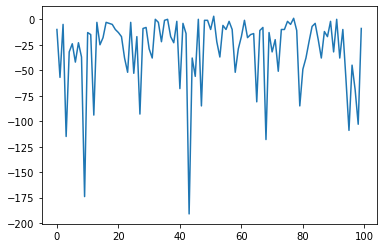

In [32]:
# Initialize environment and agent
environment = GridWorld()
random_agent = RandomAgent()

reward_per_episode = play(environment, random_agent, trials=100)

# Simple learning curve
plt.plot(reward_per_episode)

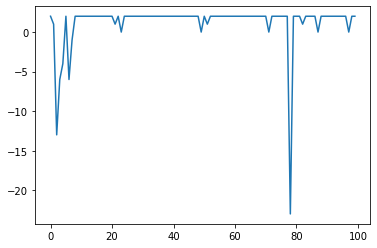

In [33]:
environment = GridWorld()
agentQ = Q_Agent(environment)

# Note the learn=True argument!
reward_per_episode = play(environment, agentQ, trials=100, learn=True)

# Simple learning curve
plt.plot(reward_per_episode)

In [34]:
def pretty(d, indent=0):
    for key, value in d.items():
        print('\t' * indent + str(key))
        if isinstance(value, dict):
            pretty(value, indent+1)
        else:
            print('\t' * (indent+1) + str(value))


pretty(agentQ.q_table)

(0, 0)
	N
		0
	S
		0
	W
		0
	E
		0
(0, 1)
	N
		0
	S
		0
	W
		0
	E
		0
(0, 2)
	N
		0
	S
		0
	W
		0
	E
		0
(0, 3)
	N
		0
	S
		0
	W
		0
	E
		0
(0, 4)
	N
		0
	S
		0
	W
		0
	E
		0
(0, 5)
	N
		0
	S
		0
	W
		0
	E
		0
(0, 6)
	N
		0
	S
		-0.7
	W
		-0.7
	E
		0
(0, 7)
	N
		-0.7
	S
		-0.7
	W
		0
	E
		-0.7
(1, 0)
	N
		0
	S
		0
	W
		0
	E
		0
(1, 1)
	N
		0
	S
		0
	W
		0
	E
		0
(1, 2)
	N
		0
	S
		0
	W
		0
	E
		0
(1, 3)
	N
		0
	S
		0
	W
		0
	E
		0
(1, 4)
	N
		0
	S
		0
	W
		0
	E
		0
(1, 5)
	N
		0
	S
		0
	W
		0
	E
		0
(1, 6)
	N
		-0.7
	S
		0
	W
		-0.7
	E
		0
(1, 7)
	N
		-0.7
	S
		-0.7
	W
		0
	E
		-0.7
(2, 0)
	N
		0
	S
		0
	W
		0
	E
		0
(2, 1)
	N
		0
	S
		0
	W
		0
	E
		0
(2, 2)
	N
		0
	S
		0
	W
		0
	E
		0
(2, 3)
	N
		0
	S
		0
	W
		0
	E
		0
(2, 4)
	N
		0
	S
		0
	W
		0
	E
		0
(2, 5)
	N
		0
	S
		0
	W
		0
	E
		0
(2, 6)
	N
		0
	S
		0
	W
		0
	E
		0
(2, 7)
	N
		-0.7
	S
		-0.7
	W
		-0.7
	E
		0
(3, 0)
	N
		0
	S
		0
	W
		0
	E
		0
(3, 1)
	N
		0
	S
		0
	W
		0
	E
		0
(3, 2)
	N
		0
	S
		0
	W
		0
	E
		0
(3, 3)
	N
		0
	S